In [1]:
import pandas as pd
import datetime

In [2]:
from prophet import Prophet

D:\Anaconda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [3]:
raw_data = pd.read_csv('E:\数据建模\测试\考虑疫情csv.csv')

数据的最后一行是9月11日，国庆结束一般是10月7日，因此要预测到国庆结束要往后推26天

In [4]:
data=raw_data.copy()
data.columns = ['ds', 'y']

In [5]:
#创建节假日数据框
qingming = pd.DataFrame({
  'holiday': 'qingming',
  'ds': pd.to_datetime(['2023-04-05','2023-04-06']),
  'lower_window': 0,
  'upper_window': 1,
})
laodong = pd.DataFrame({
  'holiday': 'laodong',
  'ds': pd.to_datetime(['2023-04-29', '2023-05-03']),
  'lower_window': 0,
  'upper_window': 1,
})
duanwu = pd.DataFrame({
  'holiday': 'duanwu',
  'ds': pd.to_datetime(['2023-06-22', '2023-06-24']),
  'lower_window': 0,
  'upper_window': 1,
})
guoqing = pd.DataFrame({
  'holiday': 'guoqing',
  'ds': pd.to_datetime(['2023-09-29', '2023-10-06']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat([qingming, laodong,duanwu,guoqing])

In [6]:
holidays

,holiday,ds,lower_window,upper_window
0,qingming,2023-04-05,0,1
1,qingming,2023-04-06,0,1
0,laodong,2023-04-29,0,1
1,laodong,2023-05-03,0,1
0,duanwu,2023-06-22,0,1
1,duanwu,2023-06-24,0,1
0,guoqing,2023-09-29,0,1
1,guoqing,2023-10-06,0,1


In [7]:
#训练有趋势的模型
data=raw_data.copy()
data.columns = ['ds', 'y']
data['ds']= pd.to_datetime(data['ds'])
# define the model
model = Prophet(holidays=holidays)
# fit the model
model.fit(data)

22:16:09 - cmdstanpy - INFO - Chain [1] start processing
22:16:09 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
# 构建待预测日期数据框，periods = 26 代表除历史数据的日期外再往后推 26 天
future = model.make_future_dataframe(periods=26)
future

,ds
0,2023-01-01
1,2023-01-02
2,2023-01-03
3,2023-01-04
4,2023-01-05
...,...
275,2023-10-03
276,2023-10-04
277,2023-10-05
278,2023-10-06


In [9]:
# 预测数据集
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
275,2023-10-03,8.571389e+06,6.856232e+06,1.014256e+07
276,2023-10-04,8.610573e+06,7.082615e+06,1.026345e+07
277,2023-10-05,8.738808e+06,7.169806e+06,1.042475e+07
278,2023-10-06,9.012000e+06,7.362064e+06,1.064195e+07
279,2023-10-07,8.467389e+06,6.891766e+06,1.013750e+07


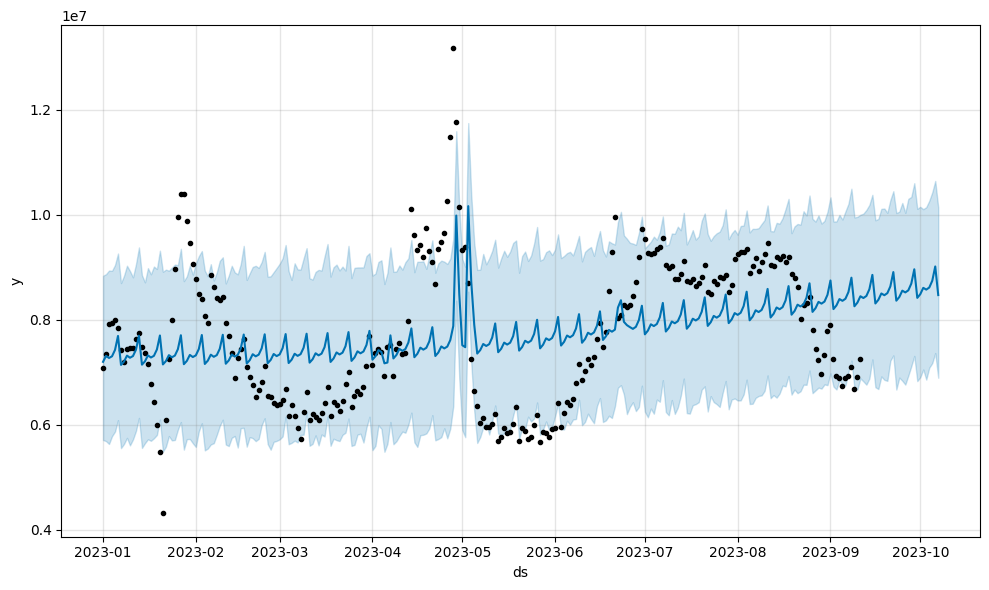

In [10]:
# 展示预测结果
model.plot(forecast);

In [26]:
forecast.to_excel('E:\\forecast_trend.xlsx')

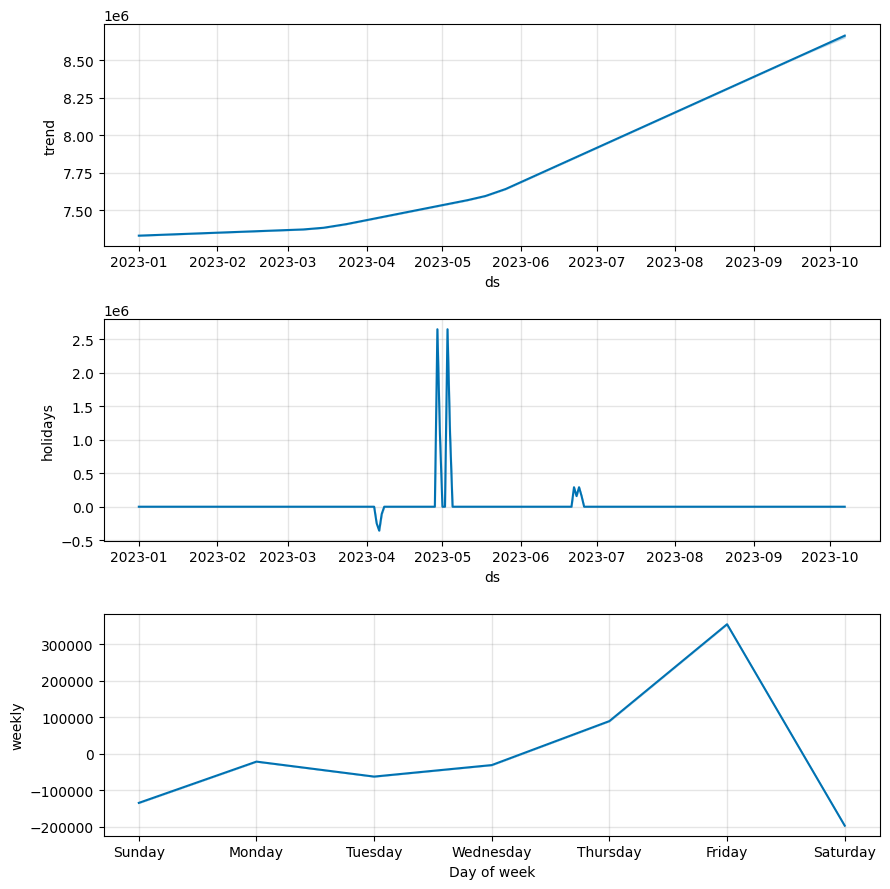

In [11]:
# 预测的成分分析绘图，展示预测中的趋势、周效应和年度效应，如果之前包含了节假日，也会展示出来。
model.plot_components(forecast);

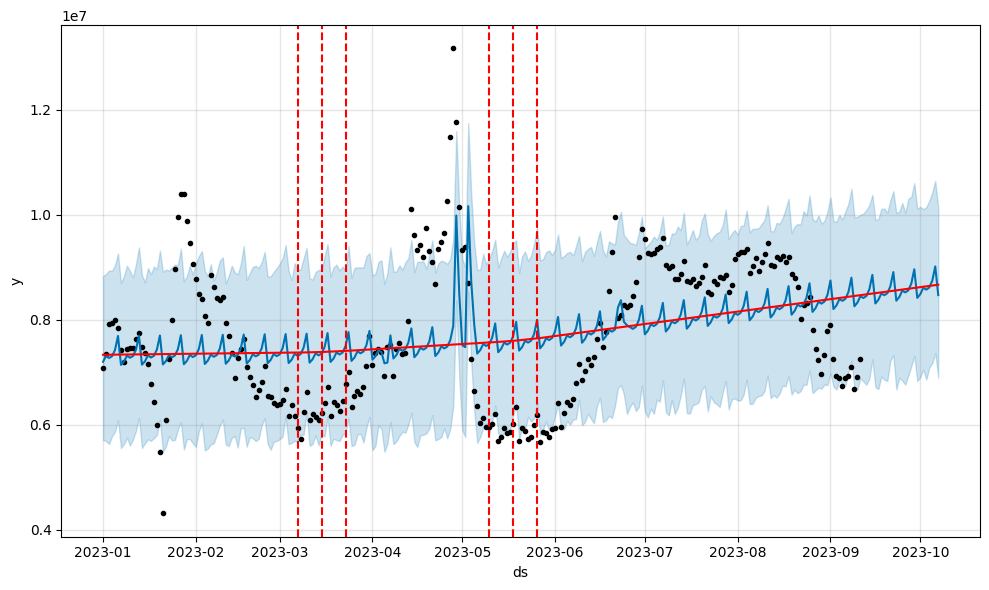

In [12]:
# 显著的突变点的位置
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),model, forecast)

In [14]:
raw_data

,统计日期,第一页面人数
0,2023/1/1,7082202.0
1,2023/1/2,7350403.0
2,2023/1/3,7910150.0
3,2023/1/4,7941681.0
4,2023/1/5,8001464.0
...,...,...
249,2023/9/7,6932239.0
250,2023/9/8,7087825.0
251,2023/9/9,6681899.0
252,2023/9/10,6899611.0


In [16]:
data_no_trend=raw_data.copy()
data_no_trend['统计日期'] = data_no_trend['统计日期'].astype('datetime64')
#删除周末
data_no_trend['week']=data_no_trend['统计日期'].map(lambda x:x.weekday()+1)
week=[6,7]
data_no_trend =data_no_trend[~data_no_trend['week'].isin(week)]
data_no_trend = data_no_trend.drop('week',axis =1)

In [17]:
#训练模型
data_no_trend.columns = ['ds', 'y']
data_no_trend['ds']= pd.to_datetime(data_no_trend['ds'])
# define the model
model_no_trend = Prophet()
# fit the model
model_no_trend.fit(data_no_trend)

22:17:27 - cmdstanpy - INFO - Chain [1] start processing
22:17:27 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
# 构建待预测日期数据框，periods = 26 代表除历史数据的日期外再往后推 26 天
future_no_trend = model_no_trend.make_future_dataframe(periods=26)
future_no_trend

,ds
0,2023-01-02
1,2023-01-03
2,2023-01-04
3,2023-01-05
4,2023-01-06
...,...
202,2023-10-03
203,2023-10-04
204,2023-10-05
205,2023-10-06


In [19]:
# 预测数据集
forecast_no_trend = model_no_trend.predict(future_no_trend)
forecast_no_trend[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
202,2023-10-03,8.425464e+06,6.726979e+06,1.011016e+07
203,2023-10-04,8.535181e+06,6.889352e+06,1.010944e+07
204,2023-10-05,8.628083e+06,6.955217e+06,1.022193e+07
205,2023-10-06,8.885584e+06,7.278698e+06,1.055819e+07
206,2023-10-07,8.575542e+06,6.956147e+06,1.032484e+07


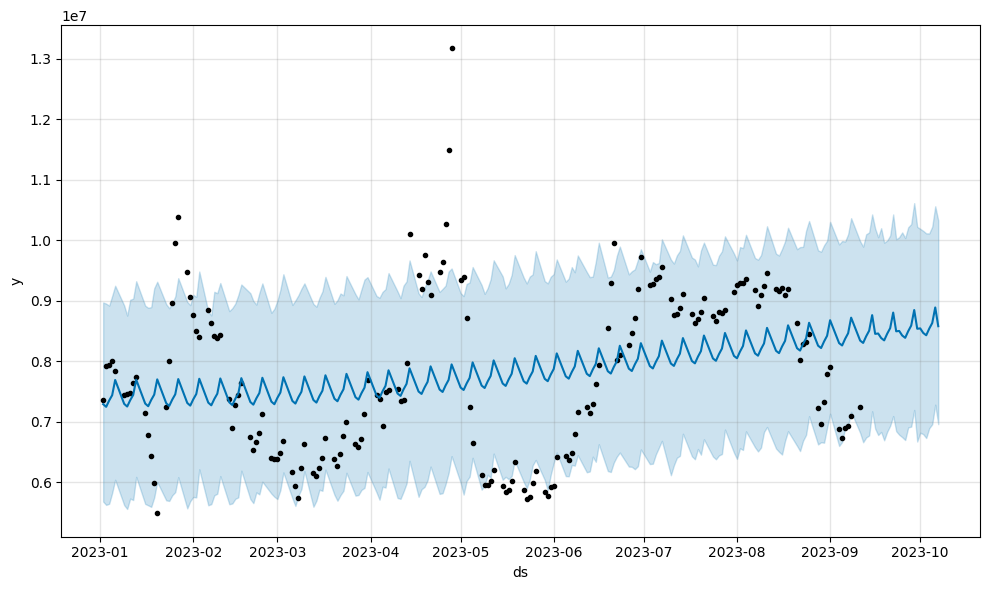

In [20]:
model_no_trend.plot(forecast_no_trend);

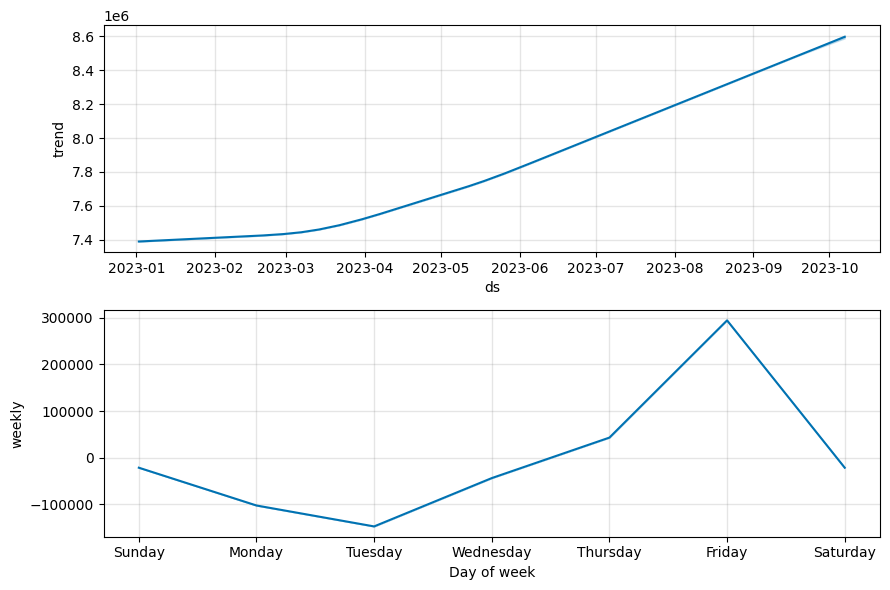

In [21]:
# 预测的成分分析绘图，展示预测中的趋势、周效应和年度效应，如果之前包含了节假日，也会展示出来。
model_no_trend.plot_components(forecast_no_trend);

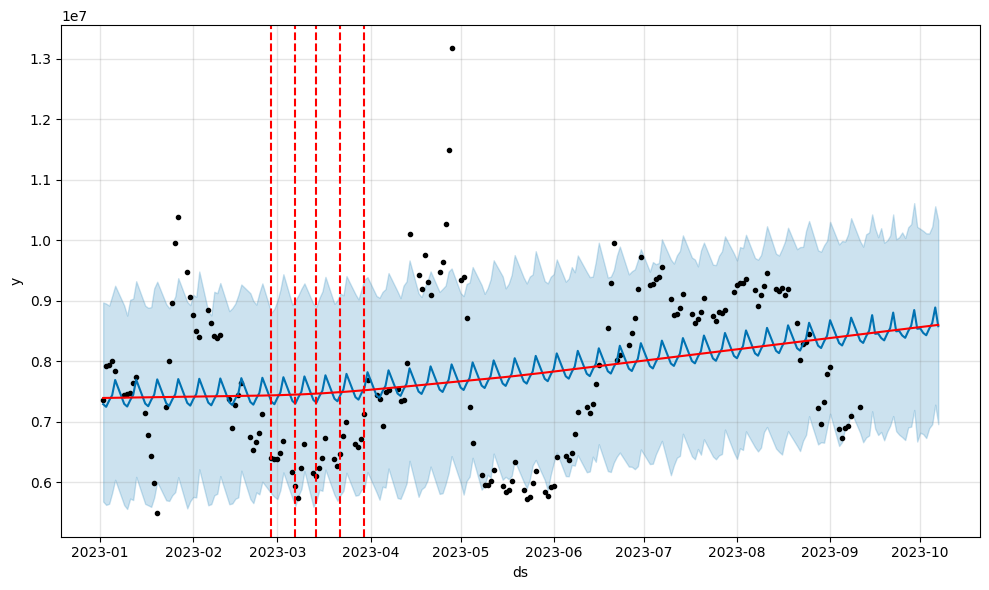

In [22]:
# 显著的突变点的位置
from prophet.plot import add_changepoints_to_plot
fig = model_no_trend.plot(forecast_no_trend)
a = add_changepoints_to_plot(fig.gca(),model_no_trend, forecast_no_trend)